# Graph Based Spin Lattice

### Find lowest ground state of simple Ising Hamiltonian
For a graph, $G = (E,V)$, defined by a set of edges, $E$, and vertices, $V$, we want to represent an Ising model, where the edge weights, $w_{ij}$ are given by the spin interactions, i.e., $w_{ij} = J_{ij}$.

Given a configuration of spins (e.g., $\uparrow\downarrow\downarrow\uparrow\downarrow$) we can define the energy using what is referred to as an Ising Hamiltonian:
$$ \hat{H} = \sum_{(i,j)\in E}J_{ij} s_is_j$$
where, $s_i=1$ if the $i^{th}$ spin is `up` and $s_i=-1$ if it is `down`, and the sumation runs over all edges in the graph. 


In [167]:
# Load relevant libraries. If you have errors you probably need to install them into your conda env

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy
random.seed(2)

### Create a graph that defines the Ising interactions

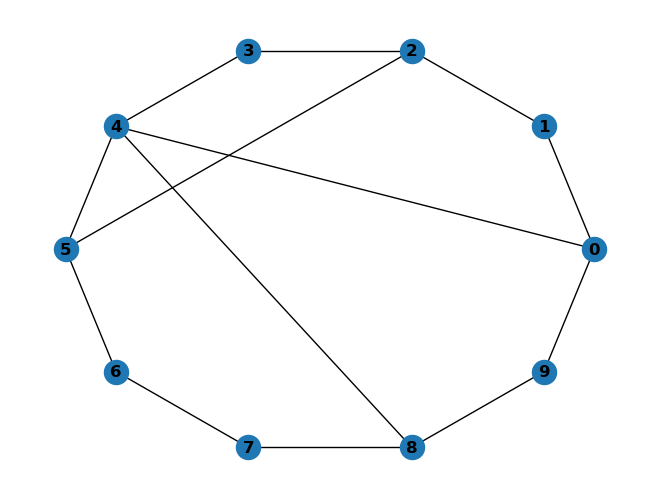

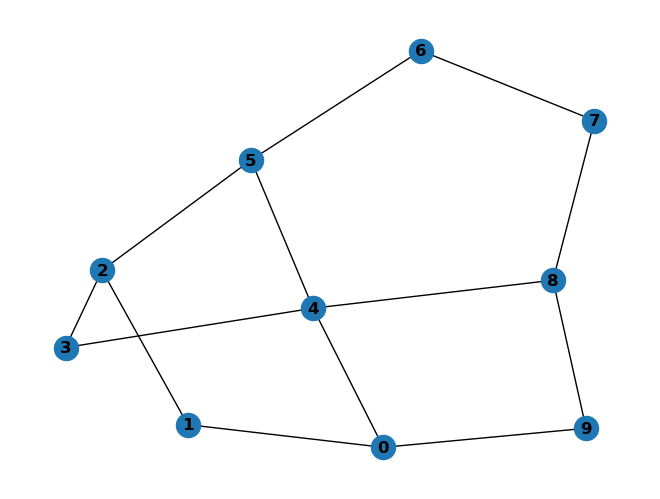

In [168]:
G = nx.Graph()
G.add_nodes_from([i for i in range(10)])
G.add_edges_from([(i,(i+1)% G.number_of_nodes() ) for i in range(10)])
G.add_edge(2,5)
G.add_edge(4,8)
G.add_edge(4,0)
for e in G.edges:
    G.edges[e]['weight'] = 1.0

# Now Draw the graph. First we will draw it with the nodes arranged on the circle, then we will draw the same graph 
# with the position of the nodes optimized for easier visualization
plt.figure(1)
nx.draw(G, with_labels=True, font_weight='bold', pos=nx.circular_layout(G))
plt.figure(2)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()



array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

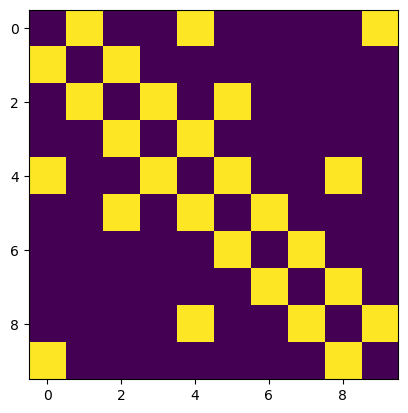

In [169]:
A = nx.adjacency_matrix(G).todense()
display(A)
plt.imshow(A);

### Add your BitString class below

In [170]:
import numpy as np
import math             


class BitString:
    """
    Simple class to implement a config of bits
    """
    def __init__(self, N):
        self.N = N
        self.config = np.zeros(N, dtype=int) 

    def __repr__(self):
        return "".join([str(bit) for bit in self.config])

    def __eq__(self, other):        
        return self.int() == other.int() 
    
    def __len__(self):
        return np.size(self.config)

    def on(self):
        return self.config.count(1)

    def off(self):
        return self.config.count(0)
    
    def flip_site(self,i):
        self.config[i] = int(not(self.config[i]))
    
    def int(self):
        return sum([(bit) * 2**i for i, bit in enumerate(reversed(self.config))])
 
    def set_config(self, s:list[int]):
        self.config = s
        
    def set_int_config(self, dec:int):
        bit_string = []
        for _ in range(self.N):
            bit_string.insert(0, dec % 2)
            dec //= 2
        self.set_config(bit_string)



In [171]:
def energy(bs: BitString, G: nx.Graph):
    """Compute energy of configuration, `bs`

        .. math::
            E = \\left<\\hat{H}\\right>

    Parameters
    ----------
    bs   : Bitstring
        input configuration
    G    : Graph
        input graph defining the Hamiltonian
    Returns
    -------
    energy  : float
        Energy of the input configuration
    """
    bs_string = str(bs)
    e = 0
    for i in range(len(bs)):
        for j in range(i,len(bs)):
            if (bs_string[i] == bs_string[j]):
                e += A[i][j] 
            else:
                e -= A[i][j]
    return e
    

### Naive minimization

Loop over all configurations and compute energies to find the lowest

 Lowest energy  -9.00000000: 0010100101


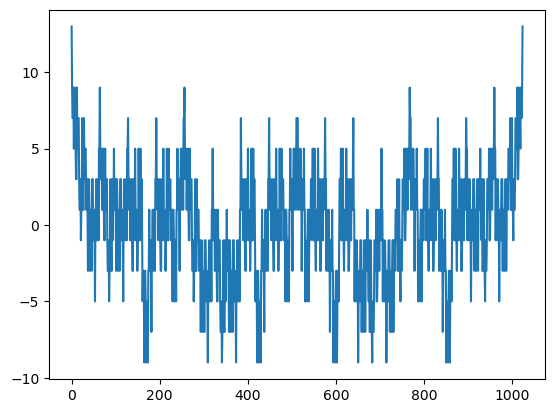

In [172]:
x = [] # Store list of indices
y = [] # Store list of energies
xmin = None # configuration of minimum energy configuration
emin = 0 # minimum of energy
my_bs = BitString(10)

# Add code here to find the lowest energy configuration
for config in range(2**10):
    my_bs.set_int_config(config)
    e = energy(my_bs, G)
    x.append(config)
    y.append(e)
    if e < emin:
        emin = e
        xmin = config
# Print out all the energies
plt.plot(x,y);

# Print out the lowest energy configuration
my_bs.set_int_config(xmin)
print(" Lowest energy %12.8f: %s" %(emin, my_bs))

assert(abs(energy(my_bs, G) - -9) < 1e-12)


### Visualize ground state
Print out the graph again, this time coloring each node according to it's state (0 or 1)

Configuration: 0010100101


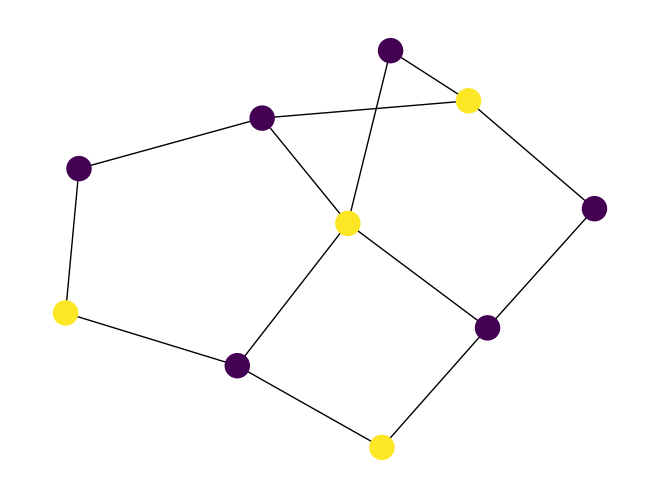

In [173]:
print("Configuration: %s" %my_bs)
nx.draw(G, node_color=my_bs.config)